In [1]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('E:/portneuf/analysis/utils/'))
import trend_sen

In [2]:
df = pd.read_csv('IrrMapper.csv')

In [3]:
df.columns

Index(['Year', 'huc12', 'Irrigated', 'Non-irrigated'], dtype='object')

In [4]:
df['Irr_pcent']  = df['Irrigated'] / (df['Irrigated'] + df['Non-irrigated']) * 100
df['Irr_acres'] = df['Irrigated'] * 0.22 # Convert to acres

In [5]:
df.tail()

,Year,huc12,Irrigated,Non-irrigated,Irr_pcent,Irr_acres
1099,2023,170402080203,5032.207843,46173.298039,9.827474,1107.085725
1100,2023,170402080201,19417.823529,68006.541176,22.210998,4271.921176
1101,2023,170402080306,17349.015686,96787.988235,15.200167,3816.783451
1102,2023,170402080301,5.737255,75117.894118,0.007637,1.262196
1103,2023,170402080104,6436.388235,107177.478431,5.665143,1416.005412


In [6]:
var_cols = ['Irr_pcent', 'Irr_acres']

In [7]:
trend_df = trend_sen.analyze_trends(df, var_list = var_cols, sort_yr='Year') 

In [8]:
trend_df

,huc12,Irr_pcent_slope,Irr_pcent_p,Irr_pcent_trend,Irr_acres_slope,Irr_acres_p,Irr_acres_trend
0,170402080101,0.122057,0.000180,increasing,39.863017,0.000180,increasing
1,170402080102,0.115422,0.005065,increasing,39.343773,0.005065,increasing
2,170402080103,0.033151,0.000678,increasing,4.154557,0.000678,increasing
3,170402080104,0.074465,0.000180,increasing,18.612597,0.000180,increasing
4,170402080105,0.364790,0.000470,increasing,101.573227,0.000470,increasing
5,170402080106,0.162810,0.000812,increasing,37.773928,0.000812,increasing
6,170402080107,0.157132,0.009202,increasing,48.523718,0.009202,increasing
7,170402080108,0.255673,0.001375,increasing,98.023667,0.001375,increasing
8,170402080201,0.268208,0.309163,no trend,51.585376,0.309163,no trend
9,170402080202,0.220410,0.002281,increasing,104.276378,0.002281,increasing


In [9]:
summary_df = trend_sen.summarize_trends(trend_df, var_cols)

In [10]:
summary_df

,Variable,Increasing,Decreasing,No Trend
0,Irr_pcent,40,0,6
1,Irr_acres,40,0,6


In [11]:
gdf = gpd.read_file('../portneuf_huc12/portneuf_huc12.shp')

In [12]:
# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
trend_df['huc12'] = trend_df['huc12'].astype(str)

In [13]:
merged_gdf = gdf.merge(trend_df, left_on='huc12', right_on='huc12')

E:\portneuf\analysis\utils\trend_sen.py:386: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plot_gdf[sig_mask].geometry.centroid.plot(


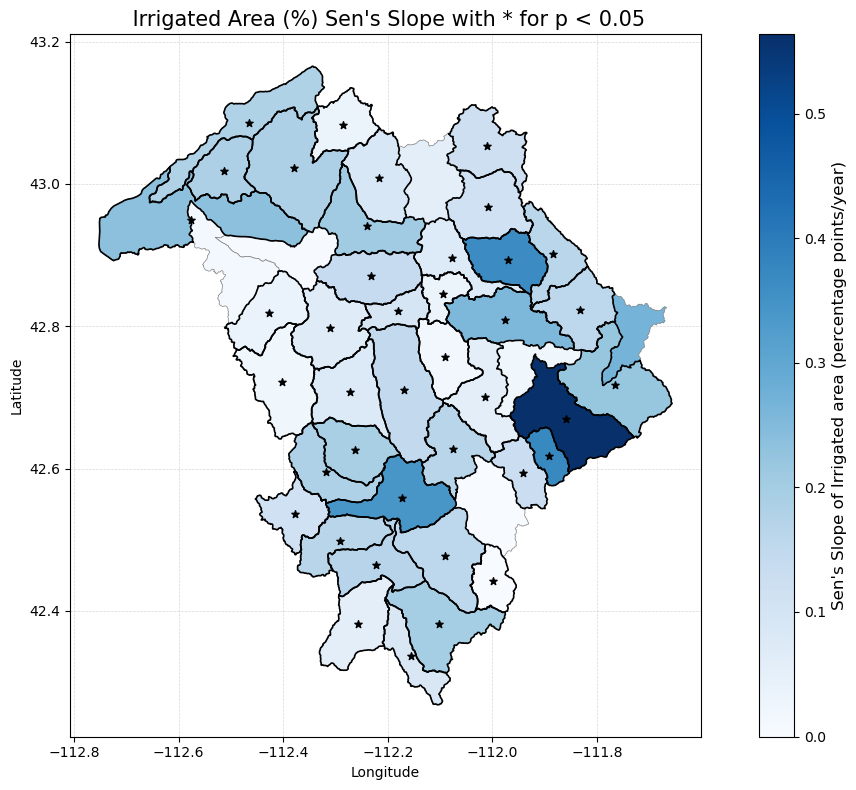

In [17]:
trend_sen.plot_trend_map(
    gdf=merged_gdf,
    slope_col=f'Irr_pcent_slope',
    pval_col=f'Irr_pcent_p',
    title=f" Irrigated Area (%) Sen's Slope with * for p < 0.05",
    cbar_label=f"Sen's Slope of Irrigated area (percentage points/year)",
    vmin=None,
    vmax=None,
    cmap= 'Blues',
    center_zero=False,
    show_significance_border=True,
    show_significance_marker=True,
    basemap=False,
    save_path= None # f'graphics/ca_pp_trend_map.png',
)

In [15]:
trend_df.Irr_acres_trend.unique()

array(['increasing', 'no trend'], dtype=object)

E:\portneuf\analysis\utils\trend_sen.py:386: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plot_gdf[sig_mask].geometry.centroid.plot(


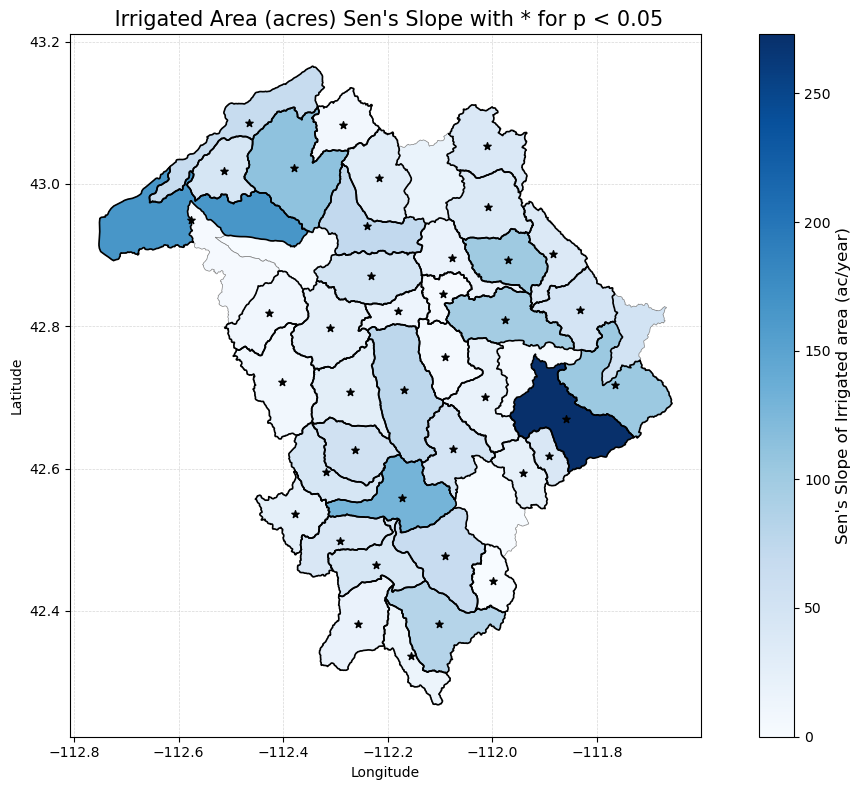

In [16]:
trend_sen.plot_trend_map(
    gdf=merged_gdf,
    slope_col=f'Irr_acres_slope',
    pval_col=f'Irr_acres_p',
    title=f" Irrigated Area (acres) Sen's Slope with * for p < 0.05",
    cbar_label=f"Sen's Slope of Irrigated area (ac/year)",
    vmin=None,
    vmax=None,
    cmap= 'Blues',
    center_zero=False,
    show_significance_border=True,
    show_significance_marker=True,
    basemap=False,
    save_path= None # f'graphics/ca_pp_trend_map.png',
)

In [18]:
df.columns

Index(['Year', 'huc12', 'Irrigated', 'Non-irrigated', 'Irr_pcent',
       'Irr_acres'],
      dtype='object')

In [22]:
df_lt = df.groupby('huc12')[['Irr_pcent', 'Irr_acres']].mean().reset_index()

In [23]:
df_lt

,huc12,Irr_pcent,Irr_acres
0,170402080101,1.500295,489.987595
1,170402080102,3.117357,1062.610641
2,170402080103,0.813106,101.899722
3,170402080104,4.898214,1224.311144
4,170402080105,12.728434,3544.145144
5,170402080106,7.150724,1659.058644
6,170402080107,9.068136,2800.312490
7,170402080108,20.428556,7832.202529
8,170402080201,12.425472,2389.835879
9,170402080202,11.594550,5485.393114


In [24]:
df_lt['huc12'] = df_lt['huc12'].astype(str)
# Merge the long-term statistics with the HUC12 GeoDataFrame (huc12_gdf)
huc12_gdf = gdf.merge(df_lt, on='huc12', how='left')

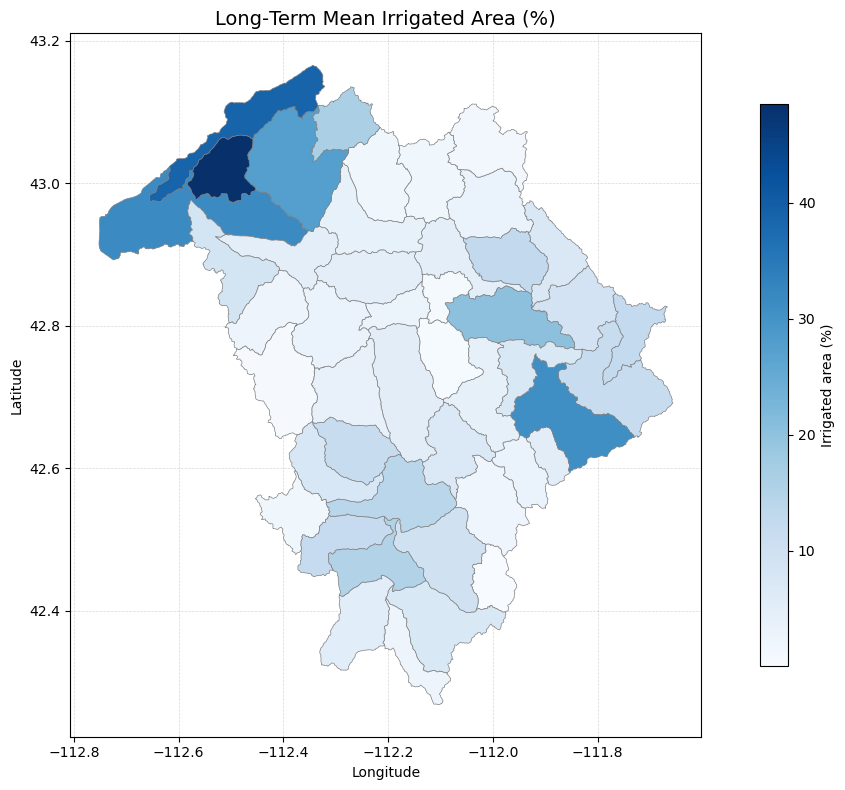

In [30]:
trend_sen.plot_gdf(
    huc12_gdf,
    column='Irr_pcent',
    cmap='Blues',
    legend_label='Irrigated area (%)',
    figsize=(12, 8),
    basemap=False,
    save_path=None,#'graphics/long_term_cl_huc12.png', #'ppt_mean_map.png',
    title='Long‑Term Mean Irrigated Area (%)'
)


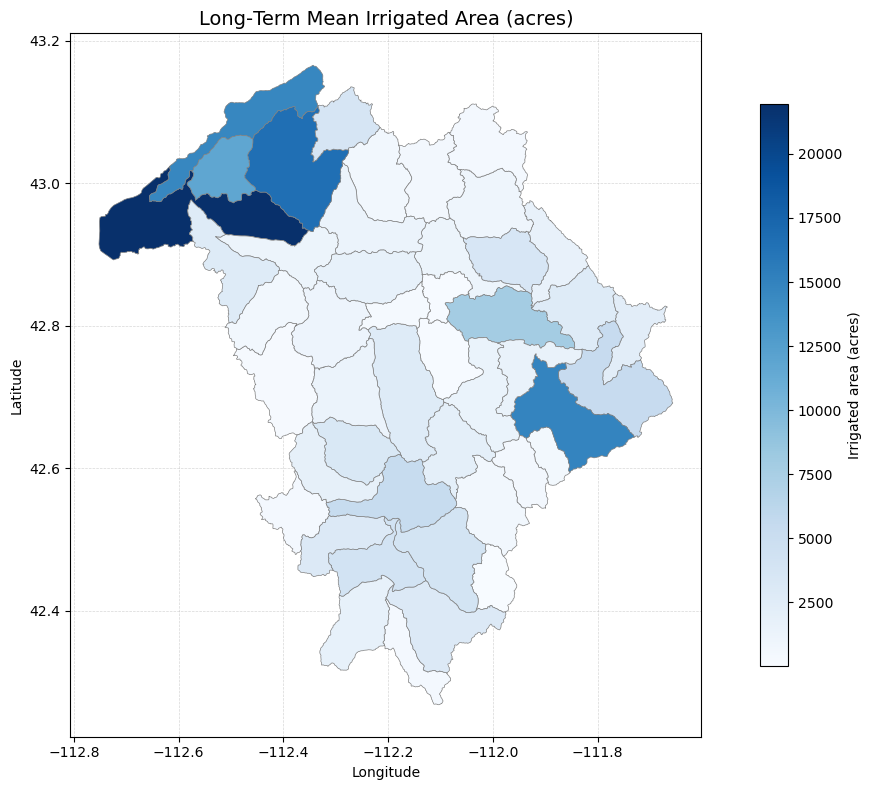

In [33]:
trend_sen.plot_gdf(
    huc12_gdf,
    column='Irr_acres',
    cmap='Blues',
    legend_label='Irrigated area (acres)',
    figsize=(12, 8),
    basemap=False,
    save_path=None,#'graphics/long_term_cl_huc12.png', #'ppt_mean_map.png',
    title='Long‑Term Mean Irrigated Area (acres)'
)
